## Convolutional Neural Network with Pytorch

### Convolution Operation

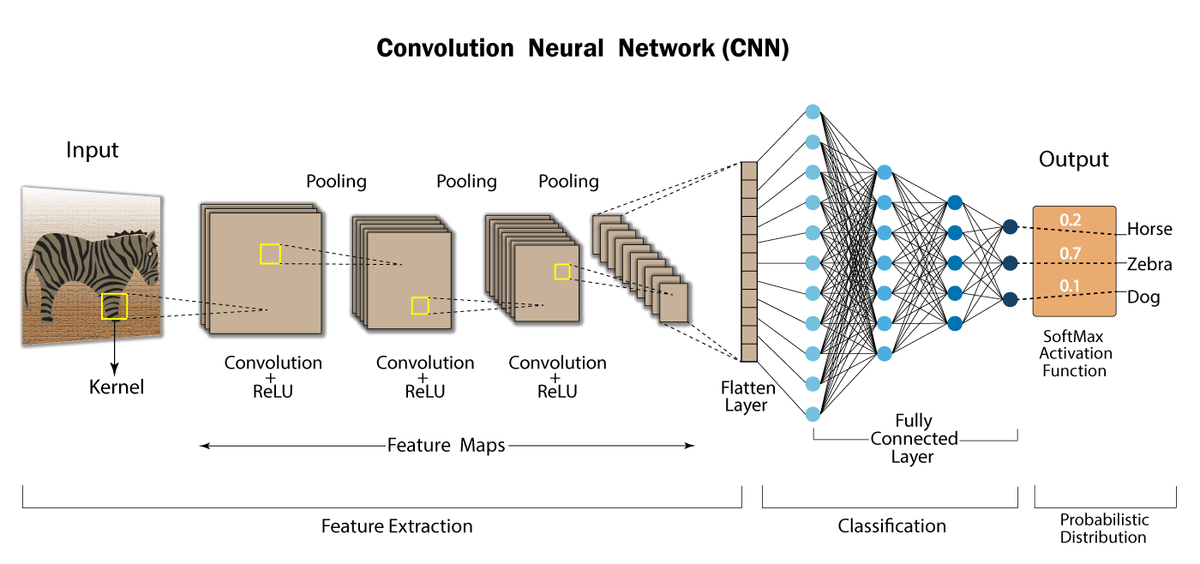

In [28]:
from IPython.display import Image
Image("cnn.png",width=700,height=300)

MNIST input iamge size: 28 x 28

CIFAR input image size: 32 x 32

### Convolution Operation

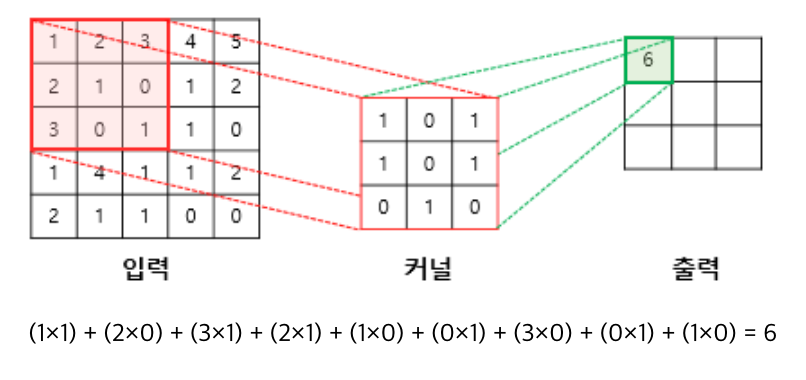

In [27]:
Image("cnn_co.png",width=450,height=200)

- 9번 반복 3 x 3

### Feature Map

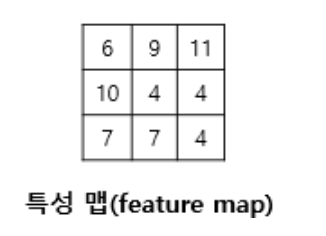

In [12]:
Image("feature_map.png",width=200,height=200)

### Stride

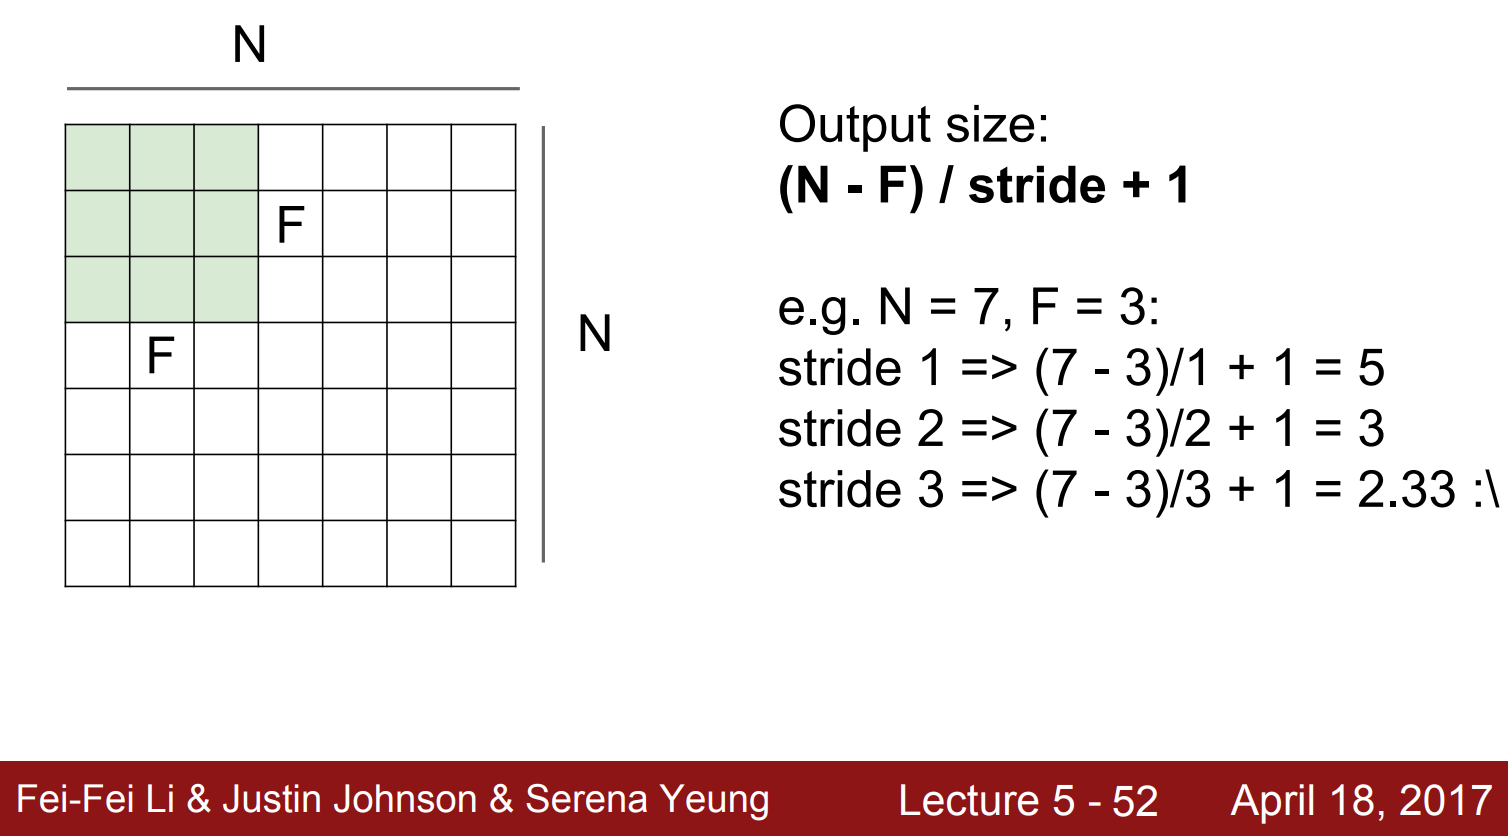

In [51]:
Image("stride_.png",width=450,height=200)

Stride = 커널의 이동범위(step size) when stride = 1

output size = (7-3) / 1 + 1 = 5

5 x 5

### Padding

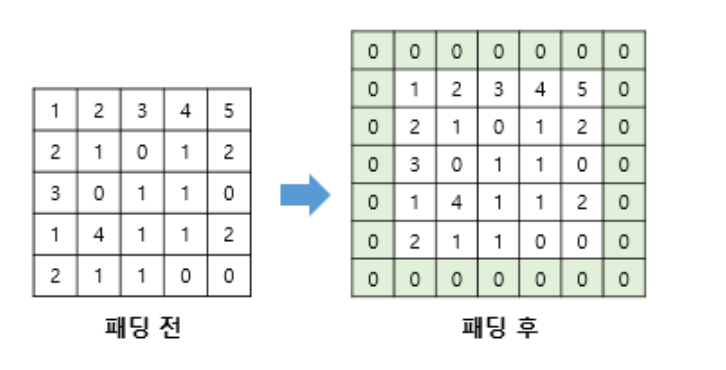

In [44]:
Image("padding.png",width=450,height=200)

Padding = Convolution operation 이후에 특성 맵의 크기가 입력의 크기와 동일하게 유지되도록 하고 싶다면 zero-padding 사용

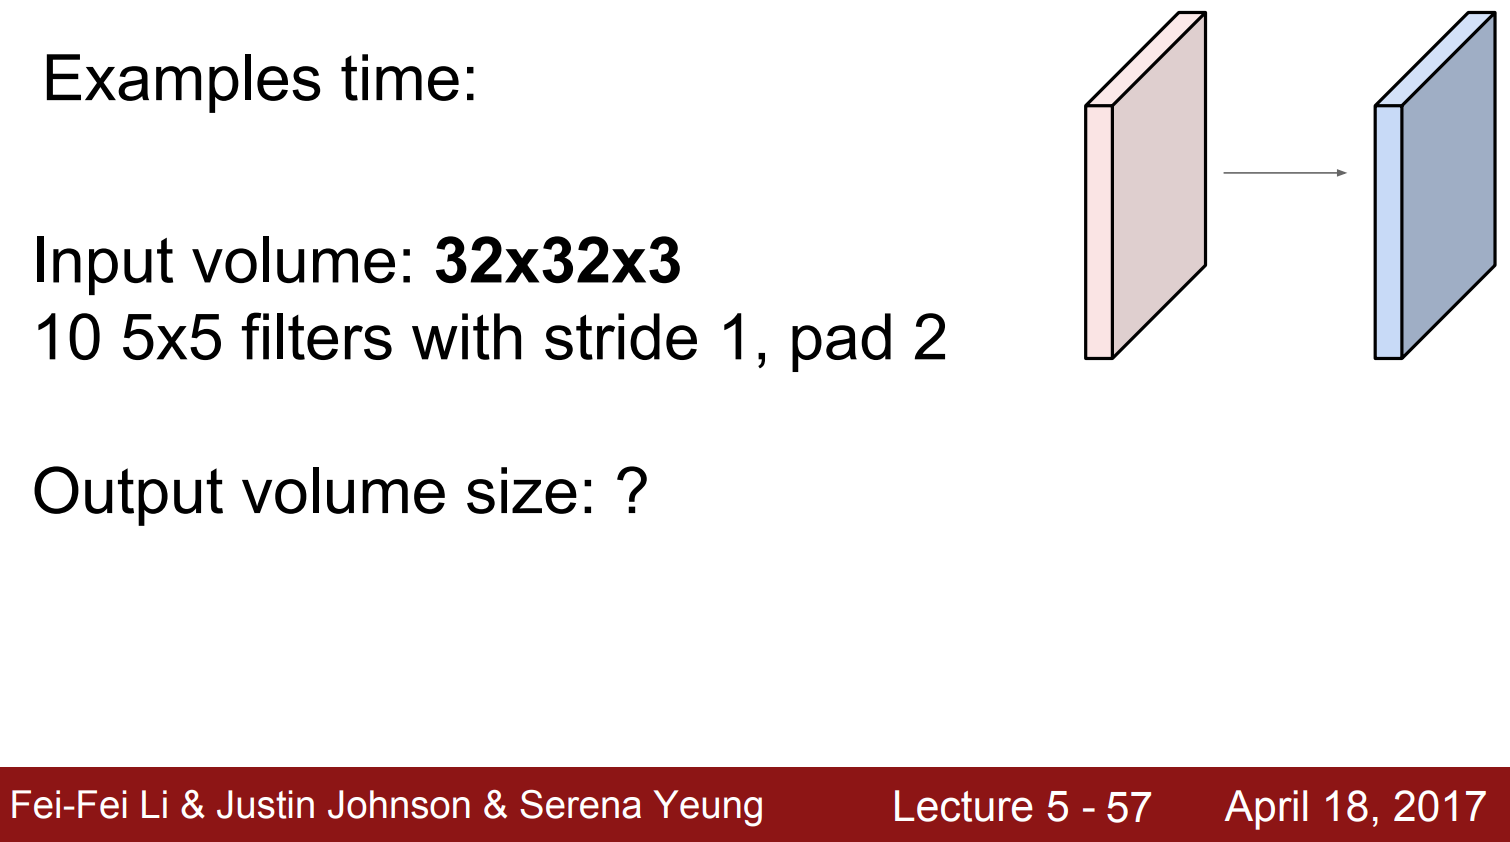

In [52]:
Image("size.png",width=450,height=200)

32 + (2x2) - 5 / 1 + 1 

-> 32 x 32 x 10

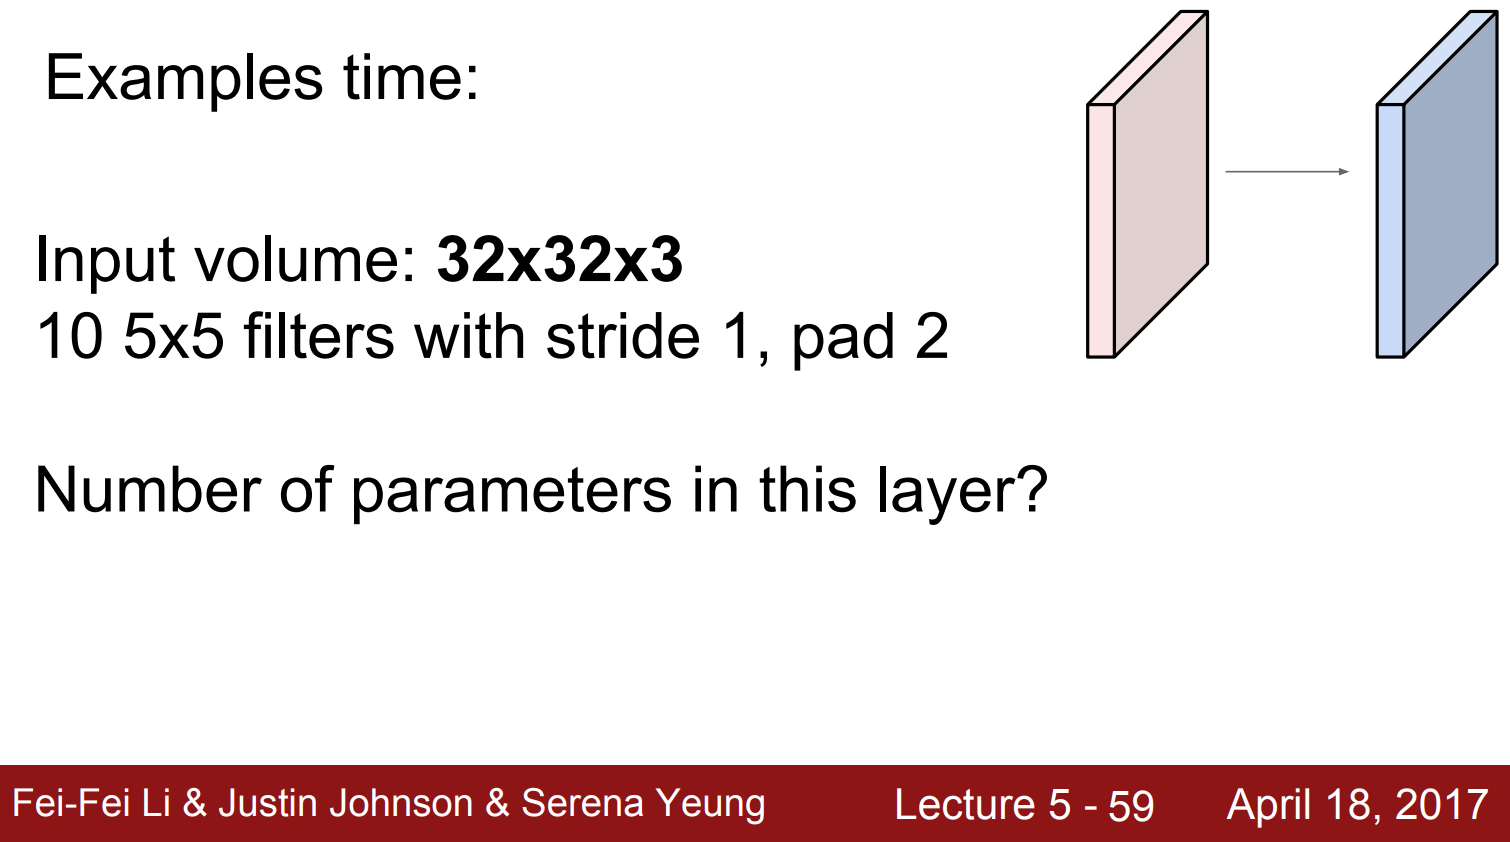

In [53]:
Image("parameters.png",width=450,height=200)

(5 x 5 x 3) + 1 = 76

-> 76 x 10 = 760 parameters 

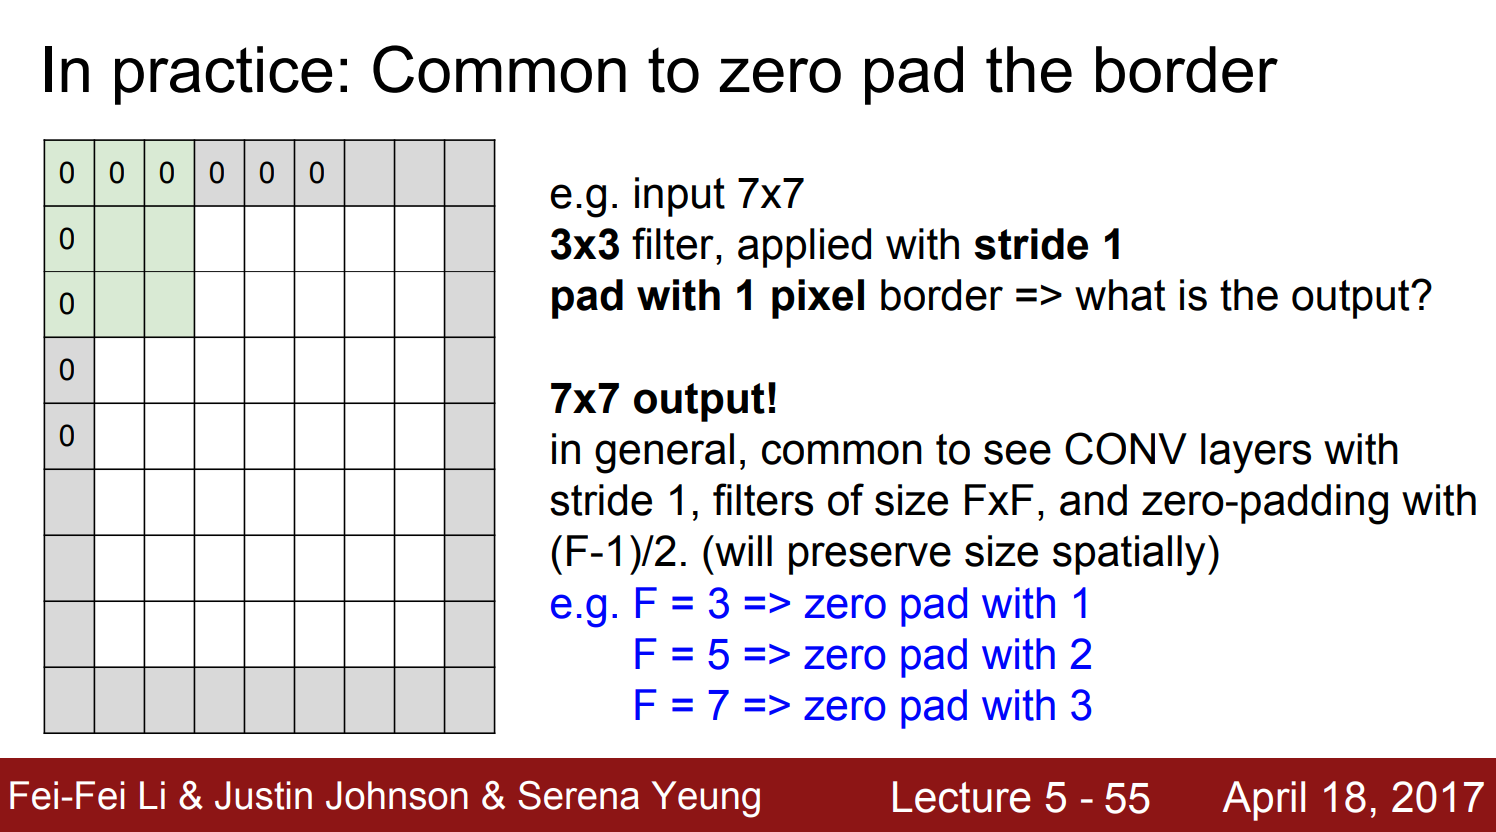

In [54]:
Image("padding_.png",width=450,height=200)

7 + (1x2) - 3 / 1 + 1

-> 7 x 7 output

### 3차원 텐서의 합성곱 연산

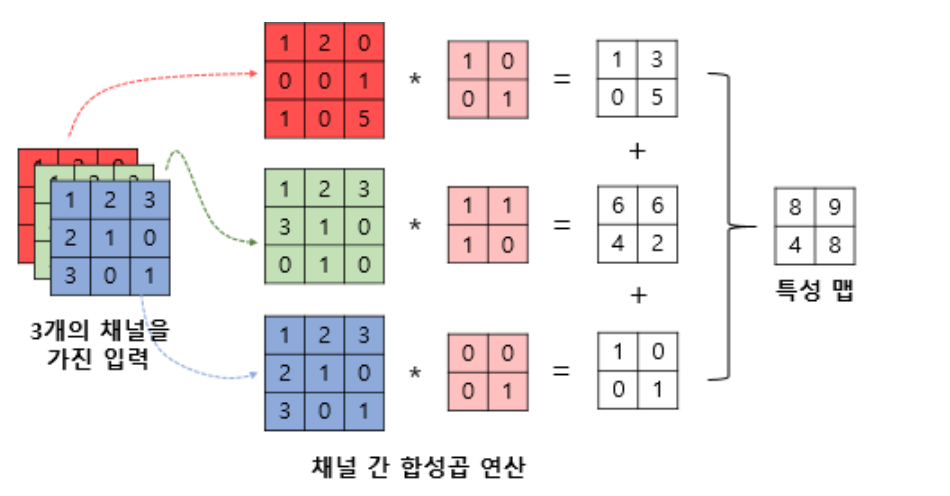

In [48]:
Image("multi_channel.png",width=450,height=200)

다수의 채널을 가진 입력 데이터를 가지고 있다면 커널의 채널의 수도 입력 채널 수만큼 존재

- 3개의 채널을 가진 1개의 kernel

### Pooling

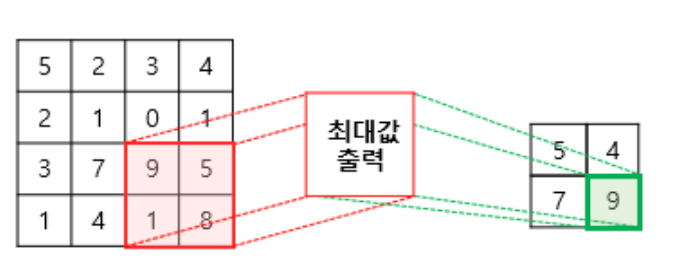

In [49]:
Image("pooling.png",width=450,height=200)

- kernel size = 2, stride = 2
- 이미지 사이즈만 축소, channel 유지

## Dilation

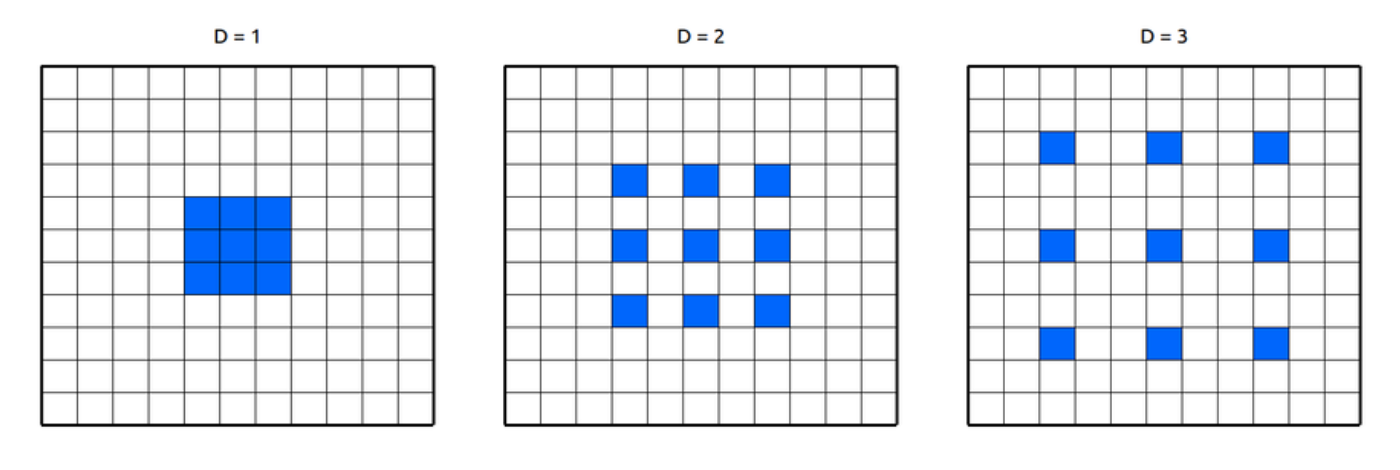

In [50]:
Image("dilation.png",width=450,height=200)

- pixel들의 거리
- 커널 사이 간격 사이즈
- 3x3 가 같이 돌아가는데, (4,2)라고 생각하면 높이가 4칸 차이 가로가 2칸 차이로 됨
- 커널 사이즈,layer, pooling을 이용할 수 있지만, 연산량 증가하는 단점 또는, 정보의 손실 가져올 수 있음
- Receptive field 크게 만들어서 커버하는 영역을 크게 -> 연산량의 증가는 가져오지 않는 효과적인 방법

### Question #1

image of 4 x 4 

- stride 2와

- 2 x 2 pooling

which is more affective?

### Answer

Benefits using pooling 

- 학습해야 할 가중치가 없고

- 채널 수가 변하지 않는다는 점

### Question #2

Consider one layer of weights (edges) in a CNN for grayscale images, connecting one layer of units to the next layer of units. Which type of layer has the fewest parameters to be learned during training?

- A convolutional layer with 10 3 x 3 filters
- A convolutional layer with 8 5 x 5 filters
- A max-pooling layer that reduces a 10 x 10 image to 5 x 5
- A fully-connected layer form 20 hidden units to 4 output units


### Answer

- 3 x 3 x 10 = 90
- 5 x 5 x 8 = 200
- channel doesn't change so no parameters?
- 20 x 4 = 80

### Code

코드 실행은 Pycharm 통해서 보여드리겠습니다

In [ ]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'


torch.manual_seed(1)


if device == 'cuda':
    torch.cuda.manual_seed_all(777)

learning_rate = 0.001
training_epochs = 15
batch_size = 100

mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [ ]:
class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()

        
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

      
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=1))

        self.classifier = nn.Sequential(
            nn.Linear(4 * 4 * 128, 625, bias=True),
            nn.Linear(625,10,bias=True)
        )

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   
        out = self.classifier(out)
        return out

model = CNN().to(device)

def cnn_train():

    criterion = torch.nn.CrossEntropyLoss().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    total_batch = len(data_loader)

    for epoch in range(training_epochs):
        avg_cost = 0

        for X, Y in data_loader: 
            X = X.to(device)
            Y = Y.to(device)

            optimizer.zero_grad()
            hypothesis = model(X)
            cost = criterion(hypothesis, Y)
            cost.backward()
            optimizer.step()

            avg_cost += cost / total_batch

        print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

if __name__ == '__main__':
    cnn_train()

https://wikidocs.net/62306

https://www.youtube.com/watch?v=bNb2fEVKeEo&list=PL3FW7Lu3i5JvHM8ljYj-zLfQRF3EO8sYv&index=5&ab_channel=StanfordUniversitySchoolofEngineeringStanfordUniversitySchoolofEngineering